In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/toronto-subway-delay-data/Toronto-Subway-Delay-Jan-2014-Jun-2021.csv
/kaggle/input/toronto-subway-delay-data/Toronto-Subway-Delay-Codes.csv


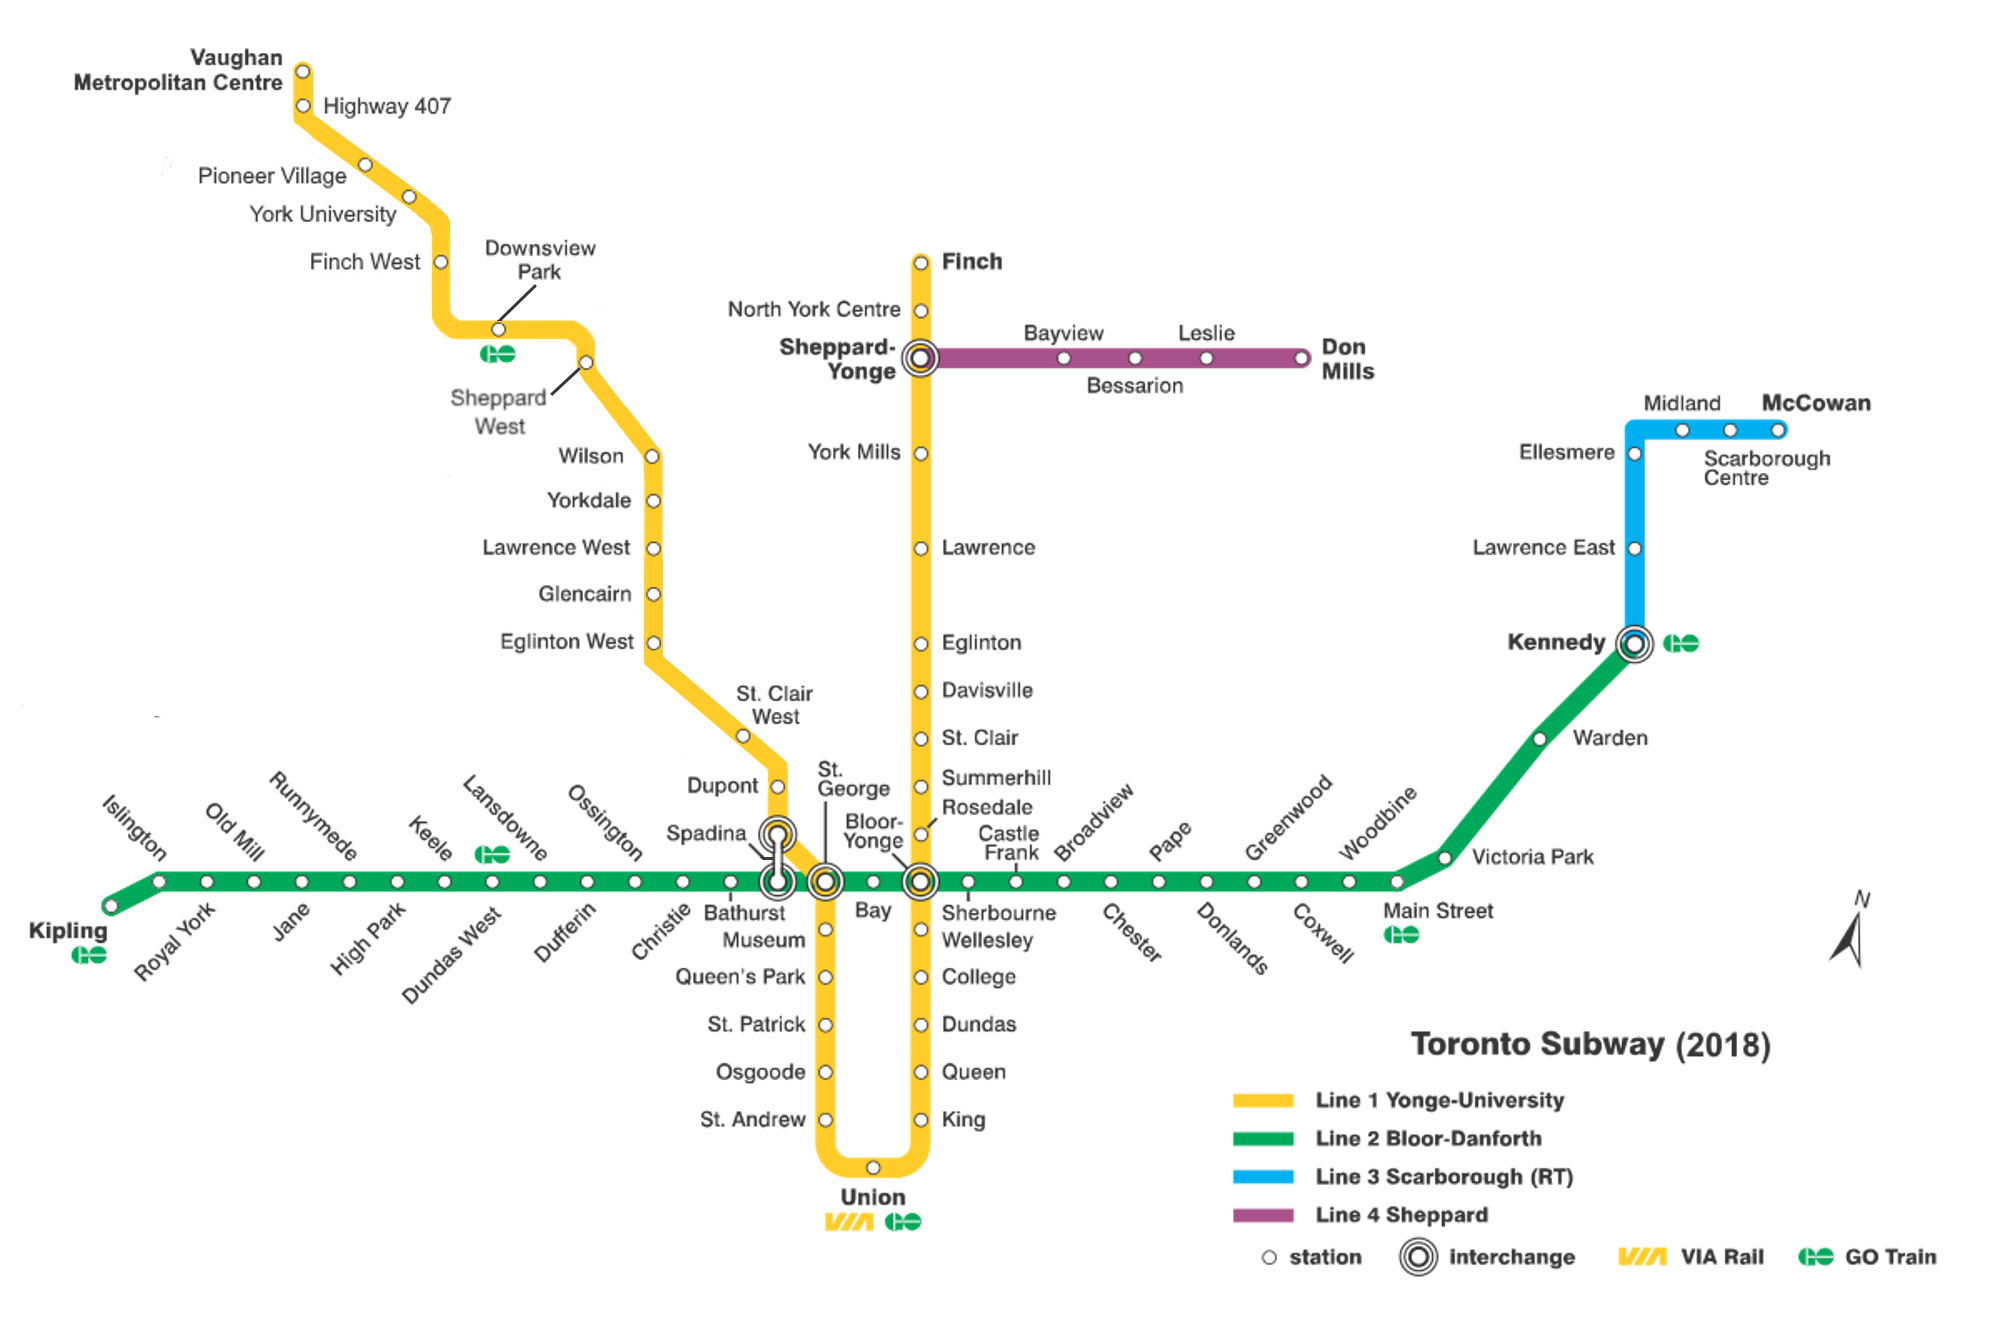
By Transportfan70 (Original by Craftwerker) - File:TTC_subway_map_2015.svg, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=64106028

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/kaggle/input/toronto-subway-delay-data/Toronto-Subway-Delay-Jan-2014-Jun-2021.csv')
df_code=pd.read_csv('/kaggle/input/toronto-subway-delay-data/Toronto-Subway-Delay-Codes.csv')

In [5]:
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2014/01/01,00:21,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111
1,2014/01/01,02:06,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001
2,2014/01/01,02:40,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0
3,2014/01/01,03:10,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116
4,2014/01/01,03:20,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386
...,...,...,...,...,...,...,...,...,...,...
143912,2021/06/30,01:23,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
143913,2021/06/30,06:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0
143914,2021/06/30,12:40,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0
143915,2021/06/30,20:50,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171


In [6]:
df.dtypes

Date         object
Time         object
Day          object
Station      object
Code         object
Min Delay     int64
Min Gap       int64
Bound        object
Line         object
Vehicle       int64
dtype: object

In [7]:
df.isnull().sum()

Date             0
Time             0
Day              0
Station          0
Code             1
Min Delay        0
Min Gap          0
Bound        32214
Line           544
Vehicle          0
dtype: int64

In [8]:
from datetime import datetime as dt

In [9]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])

In [10]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Days']=df['Date'].dt.day
df['Hour']=df['Time'].dt.hour

In [11]:
df

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Year,Month,Days,Hour
0,2014-01-01,2021-08-07 00:21:00,Wednesday,VICTORIA PARK STATION,MUPR1,55,60,W,BD,5111,2014,1,1,0
1,2014-01-01,2021-08-07 02:06:00,Wednesday,HIGH PARK STATION,SUDP,3,7,W,BD,5001,2014,1,1,2
2,2014-01-01,2021-08-07 02:40:00,Wednesday,SHEPPARD STATION,MUNCA,0,0,NaN,YU,0,2014,1,1,2
3,2014-01-01,2021-08-07 03:10:00,Wednesday,LANSDOWNE STATION,SUDP,3,8,W,BD,5116,2014,1,1,3
4,2014-01-01,2021-08-07 03:20:00,Wednesday,BLOOR STATION,MUSAN,5,10,S,YU,5386,2014,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143912,2021-06-30,2021-08-07 01:23:00,Wednesday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0,2021,6,30,1
143913,2021-06-30,2021-08-07 06:00:00,Wednesday,TORONTO TRANSIT COMMIS,MUO,0,0,NaN,SHP,0,2021,6,30,6
143914,2021-06-30,2021-08-07 12:40:00,Wednesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0,2021,6,30,12
143915,2021-06-30,2021-08-07 20:50:00,Wednesday,LESLIE STATION,MUTD,9,14,E,SHP,6171,2021,6,30,20


# 1. Time Seriea Analysis

# 1) Time Series

<AxesSubplot:xlabel='Date'>

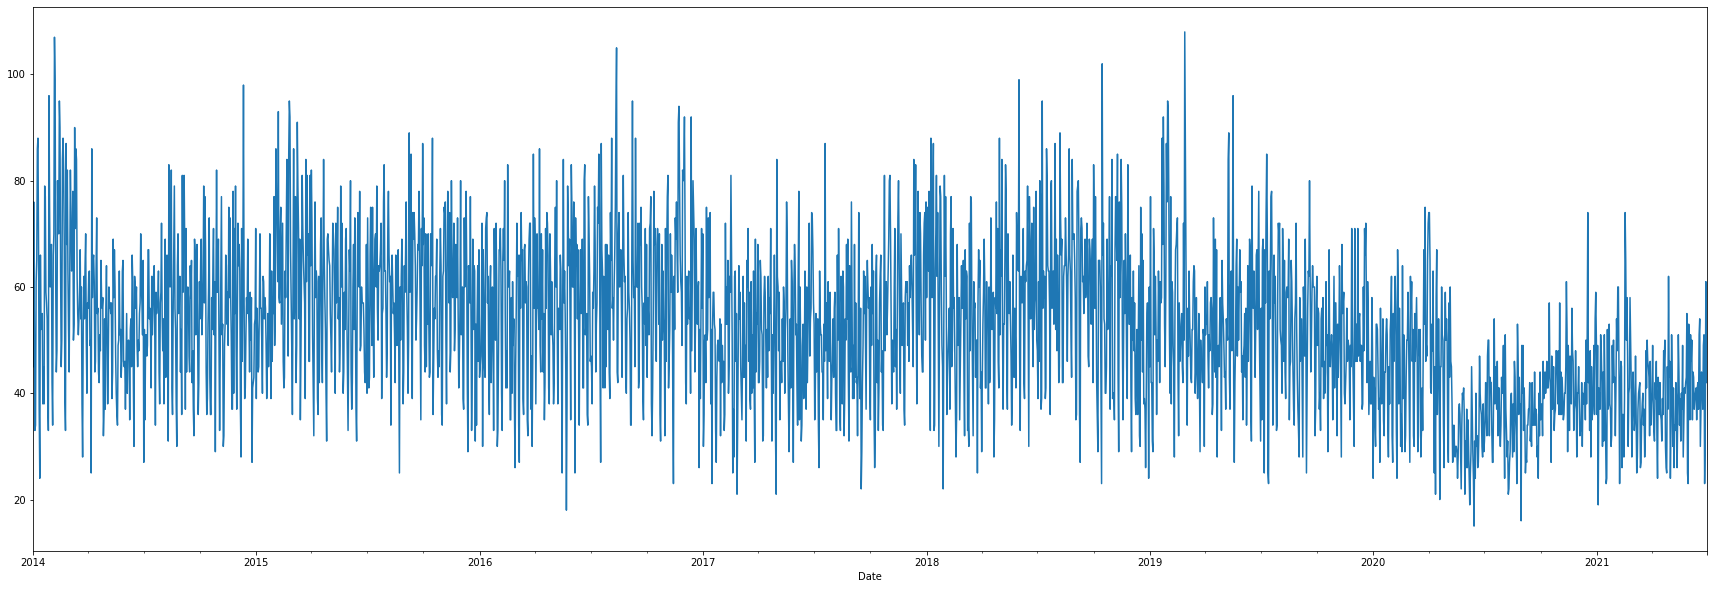

In [12]:
df_ts=df.groupby('Date')['Code'].count()
df_ts.plot(figsize=(30,10))

# 2) Prediction Model by RNN and LSTM

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [14]:
df_ts=pd.DataFrame(df_ts)
df_ts=df_ts.reset_index()
df_ts=df_ts.rename(columns={'Code': 'Num'})
df_ts=df_ts.drop('Date',axis=1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
dataset = df_ts

train = dataset[0:2130]
valid = dataset[2130:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

inputs = df_ts[len(df_ts) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_close2 = model.predict(X_test)
pred_close2 = scaler.inverse_transform(pred_close2)

2070/2070 - 45s - loss: 0.0249


In [17]:
rms=np.sqrt(np.mean(np.power((valid-pred_close2),2)))
rms

Num    13.856683
dtype: float64

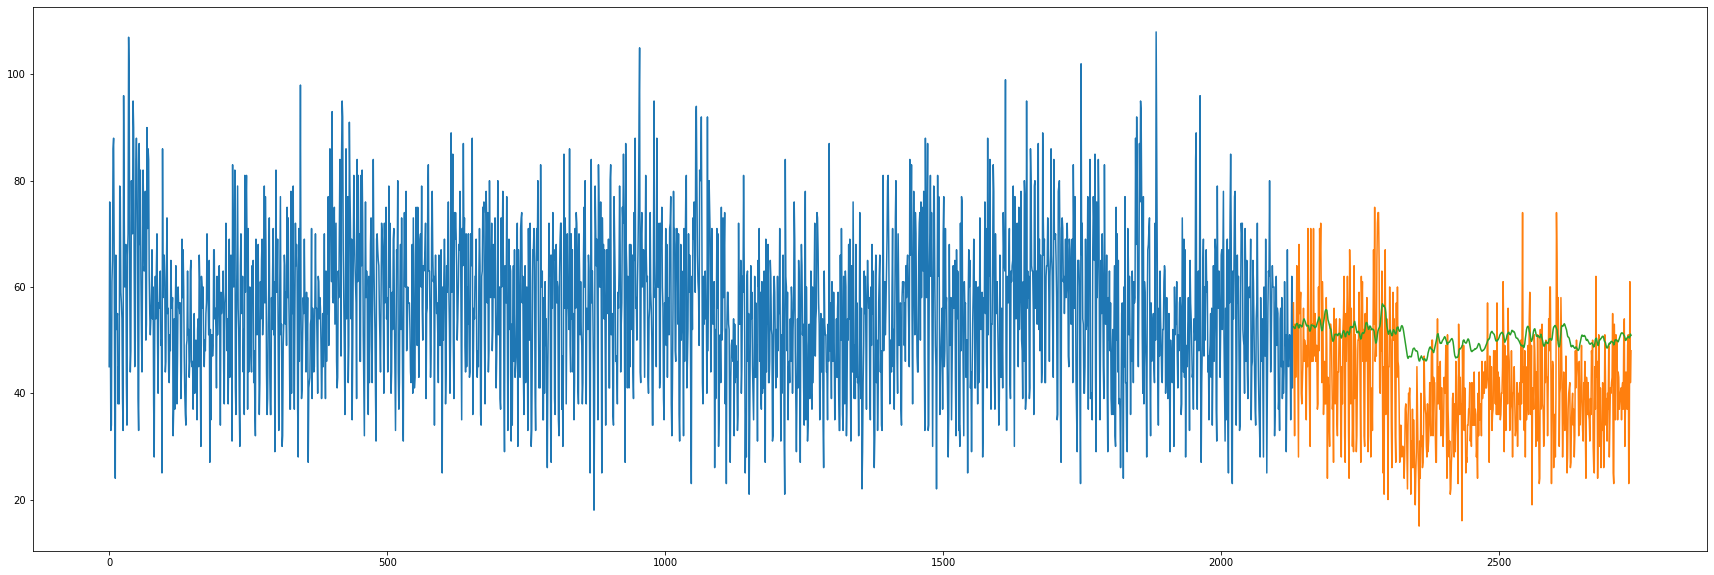

In [18]:
train = df_ts[:2130]
valid = df_ts[2130:]
valid['Predictions'] = pred_close2
plt.figure(figsize=(30,10))
plt.plot(train['Num'])
plt.plot(valid[['Num','Predictions']])

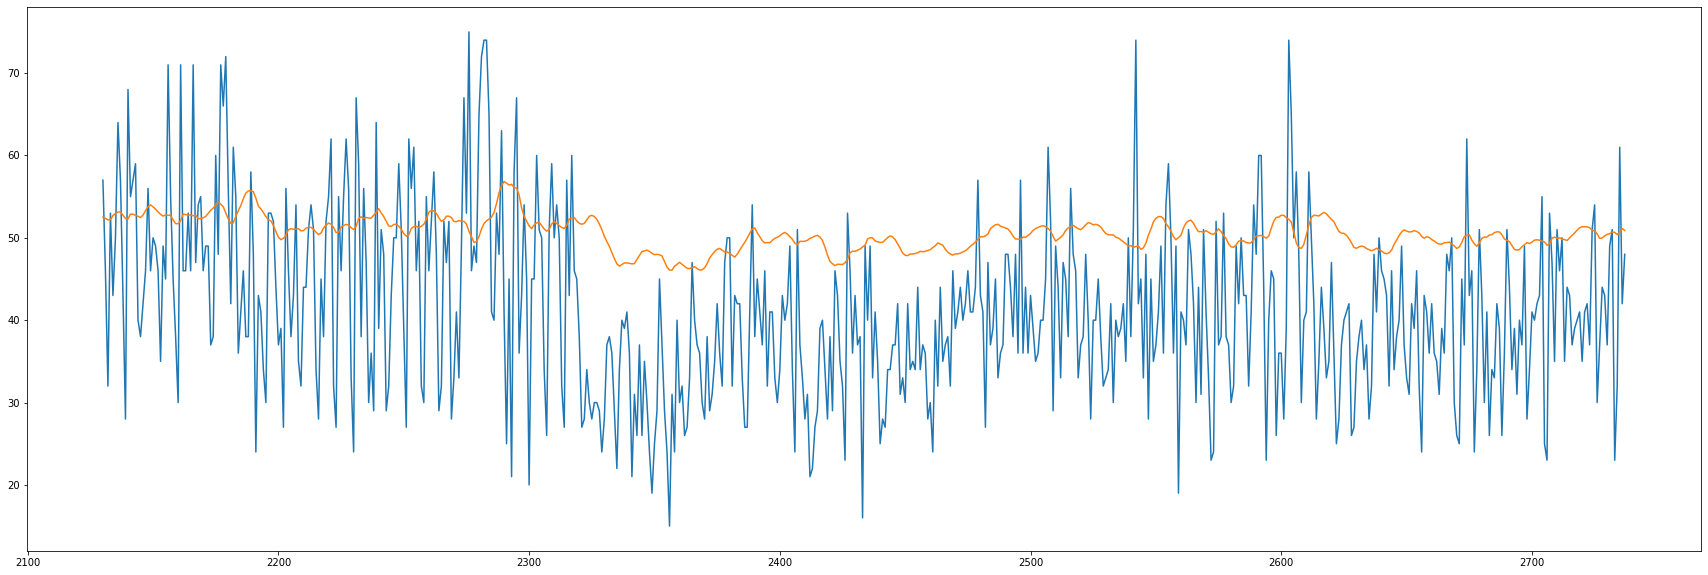

In [19]:
train = df_ts[:2130]
valid = df_ts[2130:]
plt.figure(figsize=(30,10))
valid['Predictions'] = pred_close2
plt.plot(valid[['Num','Predictions']])

# 3) Prediction Model by Prophet

In [20]:
df_ts=df.groupby('Date')['Code'].count()
df_ts=pd.DataFrame(df_ts)
df_ts=df_ts.reset_index()

In [21]:
from fbprophet import Prophet
import datetime

df_ts.rename(columns={'Code': 'y', 'Date': 'ds'}, inplace=True)

train = df_ts[:2130]
valid = df_ts[2130:]

model = Prophet()
model.fit(train)

pred = model.make_future_dataframe(periods=608, freq = 'd')
forecast = model.predict(pred)

In [22]:
forecast_valid = forecast['yhat'][2130:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

12.816844730775536

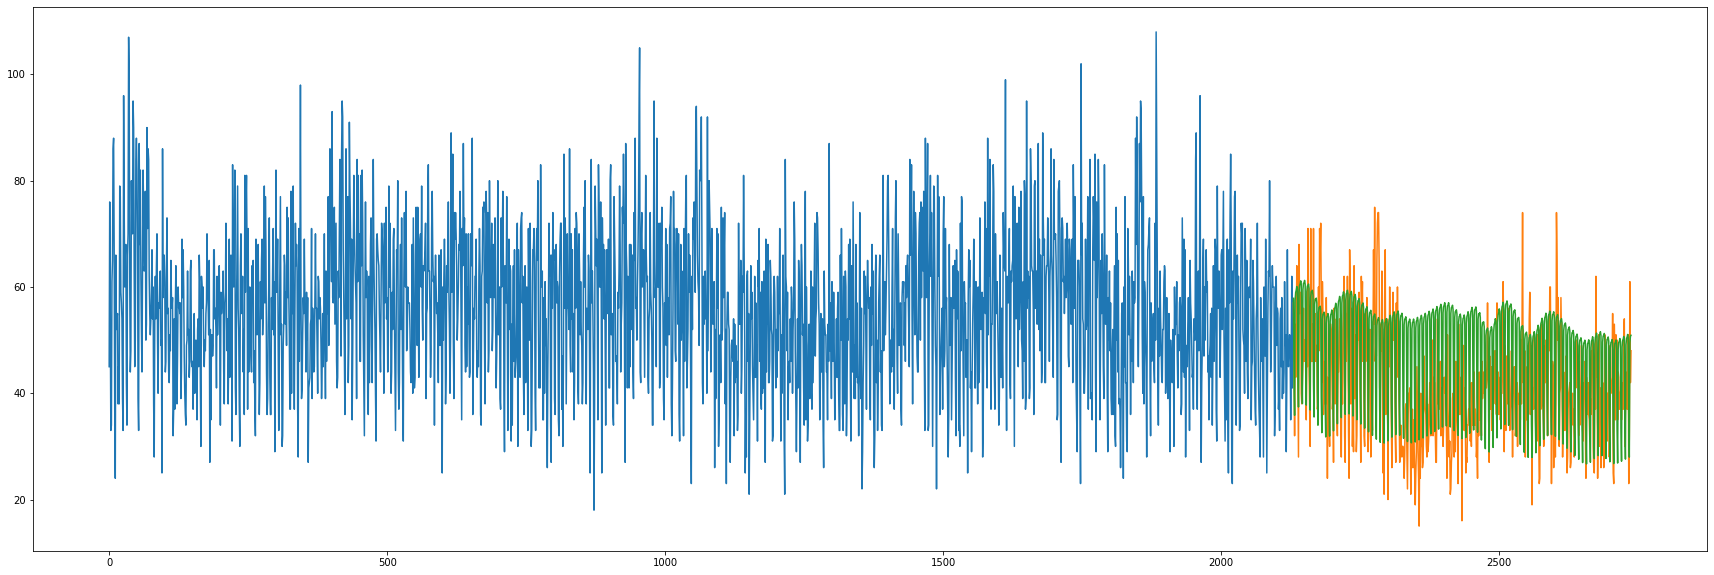

In [23]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.figure(figsize=(30,10))
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

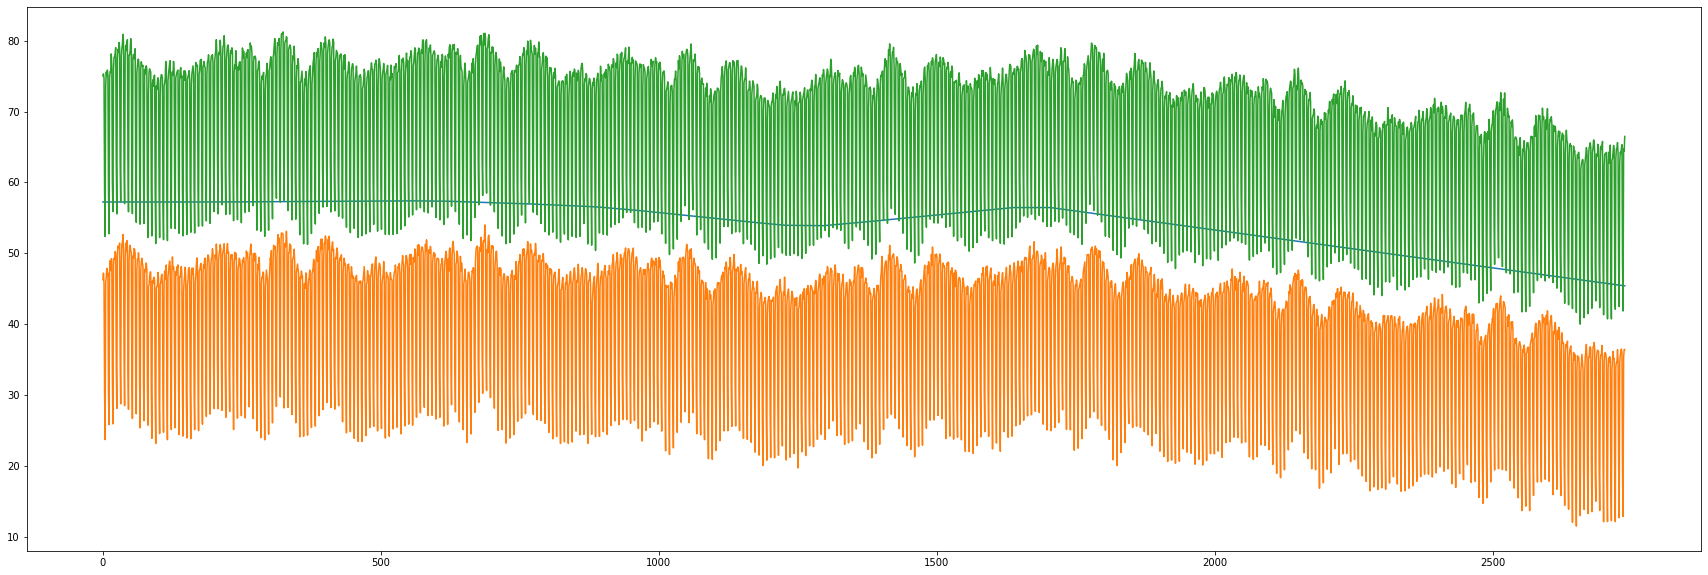

In [24]:
plt.figure(figsize=(30,10))
plt.plot(forecast[['trend','yhat_lower','yhat_upper']])

# 2. Top 100 longest Delay Analysis

In [25]:
df_100delay=df.sort_values('Min Delay', ascending=False).head(100)

# 1) Top 100 Longest Delay Analysis by Stations, Lines, Cause(Code) and Min Delay 

In [26]:
df_100delay

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Year,Month,Days,Hour
23112,2015-02-17,2021-08-07 06:56:00,Tuesday,MCCOWAN STATION TO KEN,ERHV,999,999,N,SRT,3007,2015,2,17,6
2054,2014-02-05,2021-08-07 12:35:00,Wednesday,MCCOWAN STATION,MRWEA,788,0,S,SRT,3012,2014,2,5,12
49626,2016-05-19,2021-08-07 16:35:00,Thursday,JANE STATION,MUPLA,575,579,E,BD,5291,2016,5,19,16
22546,2015-02-07,2021-08-07 15:30:00,Saturday,KENNEDY SRT STATION,ERHV,555,600,N,SRT,3015,2015,2,7,15
98824,2018-10-20,2021-08-07 17:44:00,Saturday,KENNEDY BD STATION,SUAP,515,519,E,BD,5359,2018,10,20,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86597,2018-03-26,2021-08-07 11:11:00,Monday,EGLINTON STATION,MUFM,131,134,N,YU,5421,2018,3,26,11
122942,2020-01-25,2021-08-07 11:32:00,Saturday,RUNNYMEDE STATION,MUPR1,131,135,W,BD,5309,2020,1,25,11
106112,2019-02-28,2021-08-07 15:01:00,Thursday,RUNNYMEDE STATION,MUPR1,130,133,W,BD,5165,2019,2,28,15
110563,2019-05-25,2021-08-07 20:57:00,Saturday,DUFFERIN STATION,SUBT,130,134,E,BD,5211,2019,5,25,20


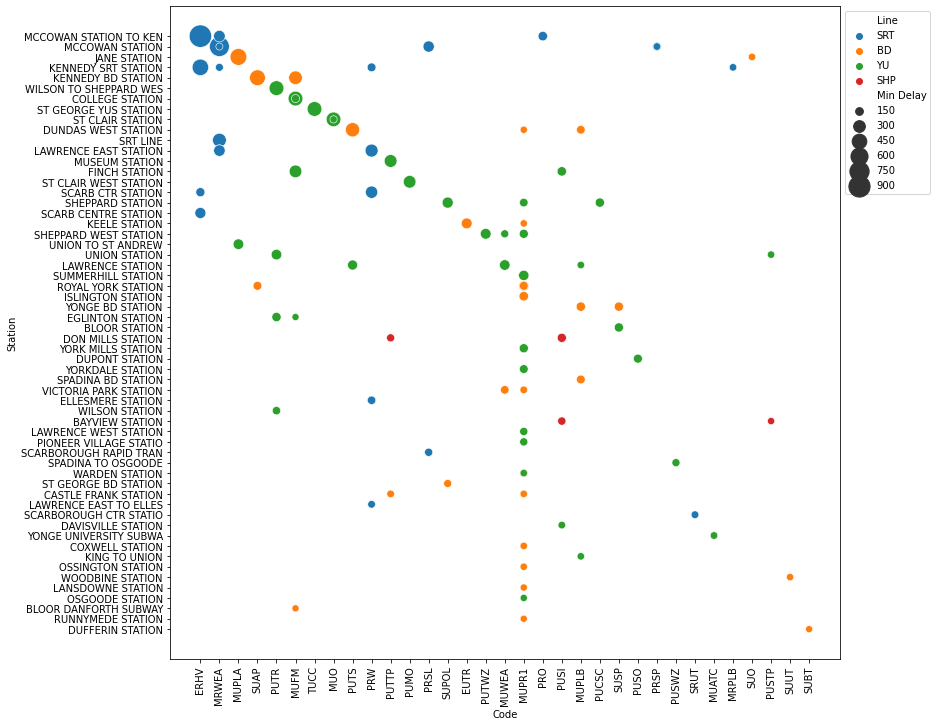

In [27]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_100delay['Code'],y=df_100delay['Station'],hue=df_100delay['Line'],size=df_100delay['Min Delay'],data=df_100delay,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

# 2) Top 100 Longest Delay Analysis by Days,Weekday and Hour

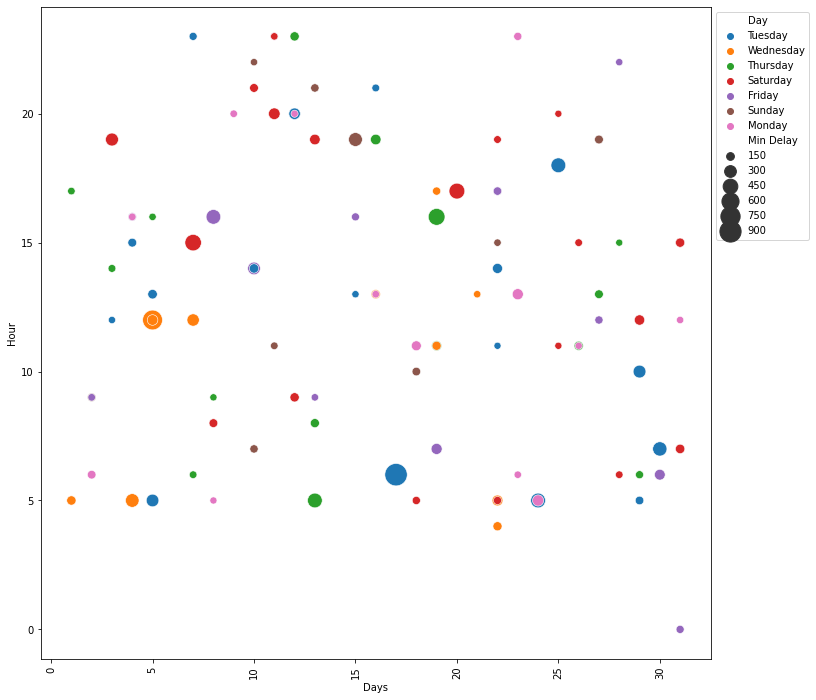

In [28]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df_100delay['Days'],y=df_100delay['Hour'],hue=df_100delay['Day'],size=df_100delay['Min Delay'],data=df_100delay,sizes=(50,500))
plt.setp(ax.get_xticklabels(), rotation=90)
ax.legend(loc='upper left',bbox_to_anchor=(1,1))

# 3. High Frequency Delay Analysis

# 1) Delay Frequency by Year(2021 includes only 6 months)

<AxesSubplot:xlabel='Year'>

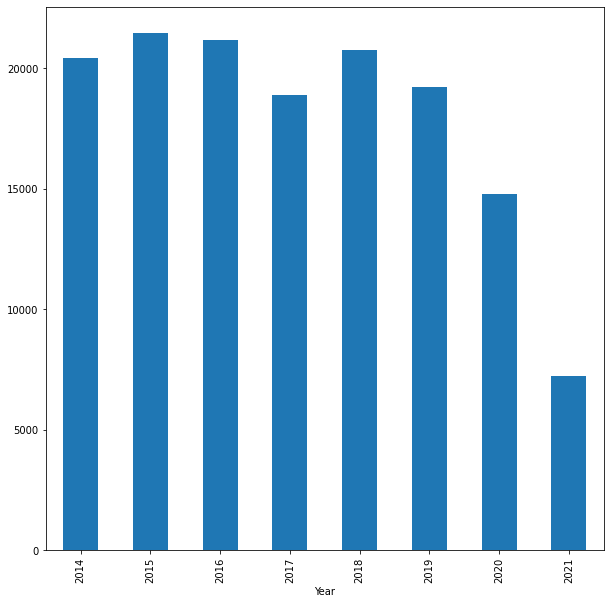

In [29]:
df.groupby('Year')['Code'].count().plot.bar(figsize=(10,10))

# 2) Delay Frequency by Mpnth (July to December do not include 2021)

<AxesSubplot:xlabel='Month'>

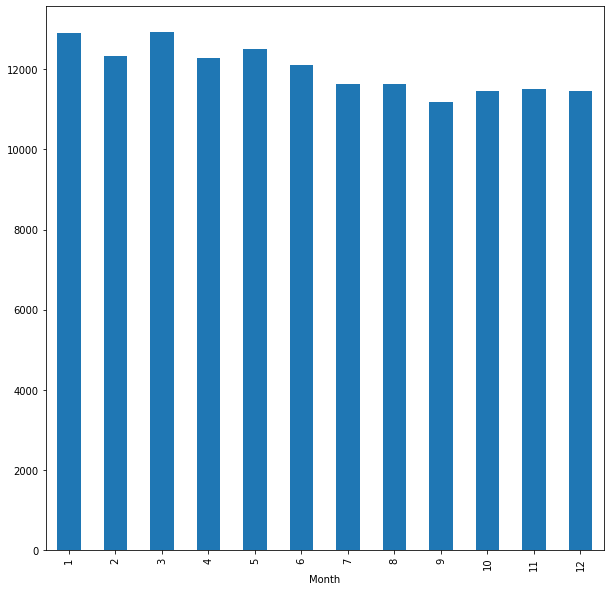

In [30]:
df.groupby('Month')['Code'].count().plot.bar(figsize=(10,10))

# 3) Delay Frequency by Days

<AxesSubplot:xlabel='Days'>

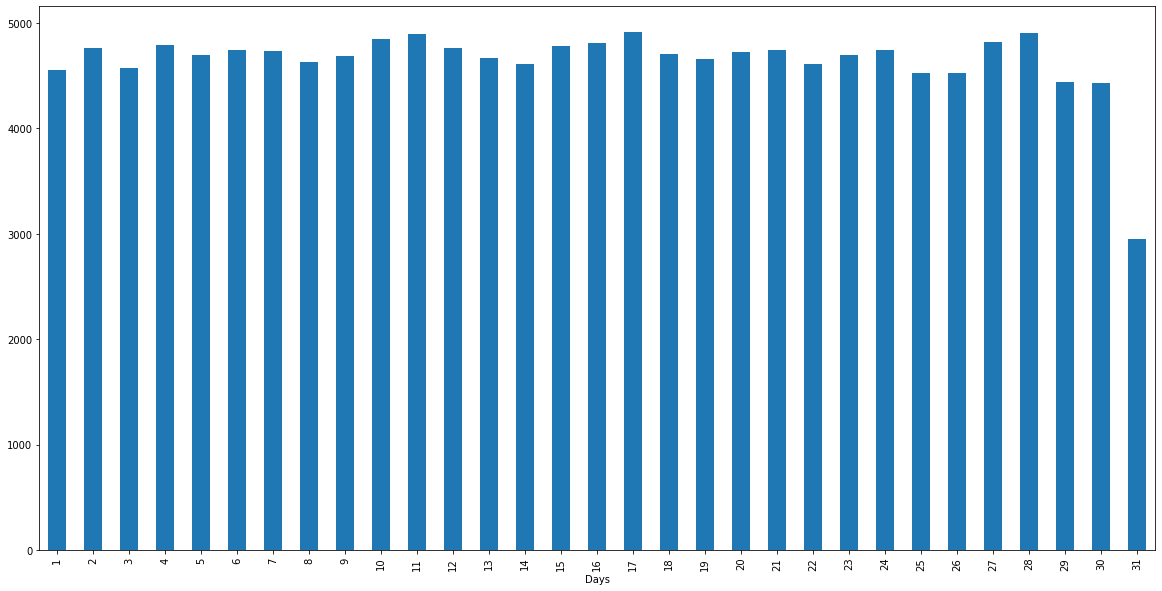

In [31]:
df.groupby('Days')['Code'].count().plot.bar(figsize=(20,10))

# 4) Delay Frequency by Day of Week

<AxesSubplot:xlabel='Day'>

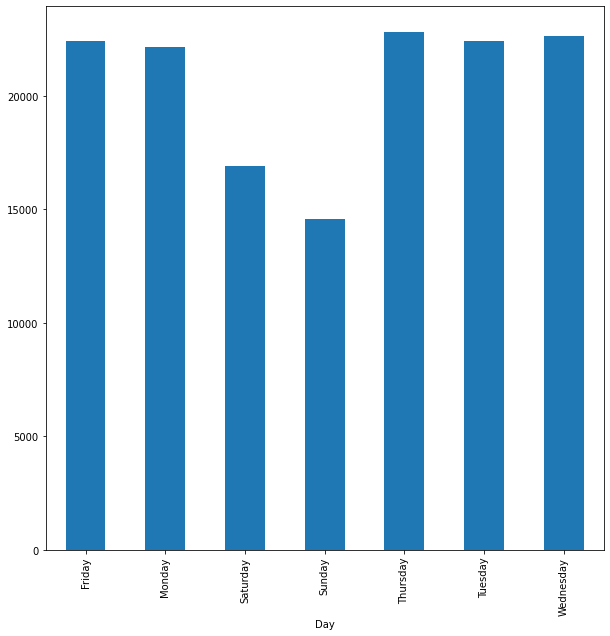

In [32]:
df.groupby('Day')['Code'].count().plot.bar(figsize=(10,10))

# 5) Delay Frequency by Hour

<AxesSubplot:xlabel='Hour'>

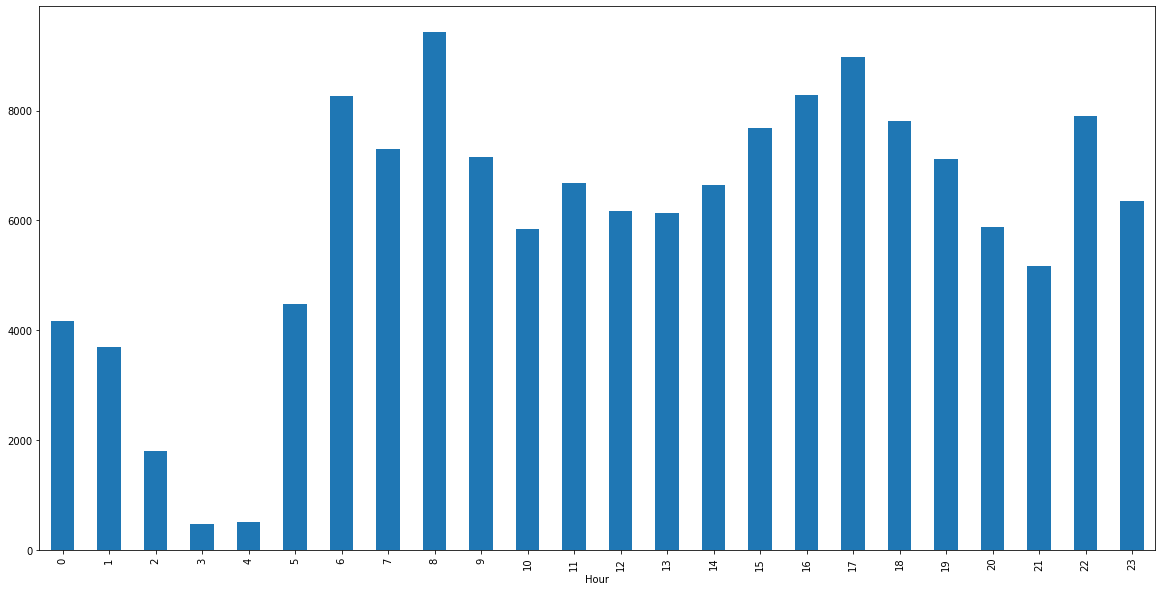

In [33]:
df.groupby('Hour')['Code'].count().plot.bar(figsize=(20,10))

# 6) Top 100 Stations which have most frequent delay

<AxesSubplot:xlabel='Station'>

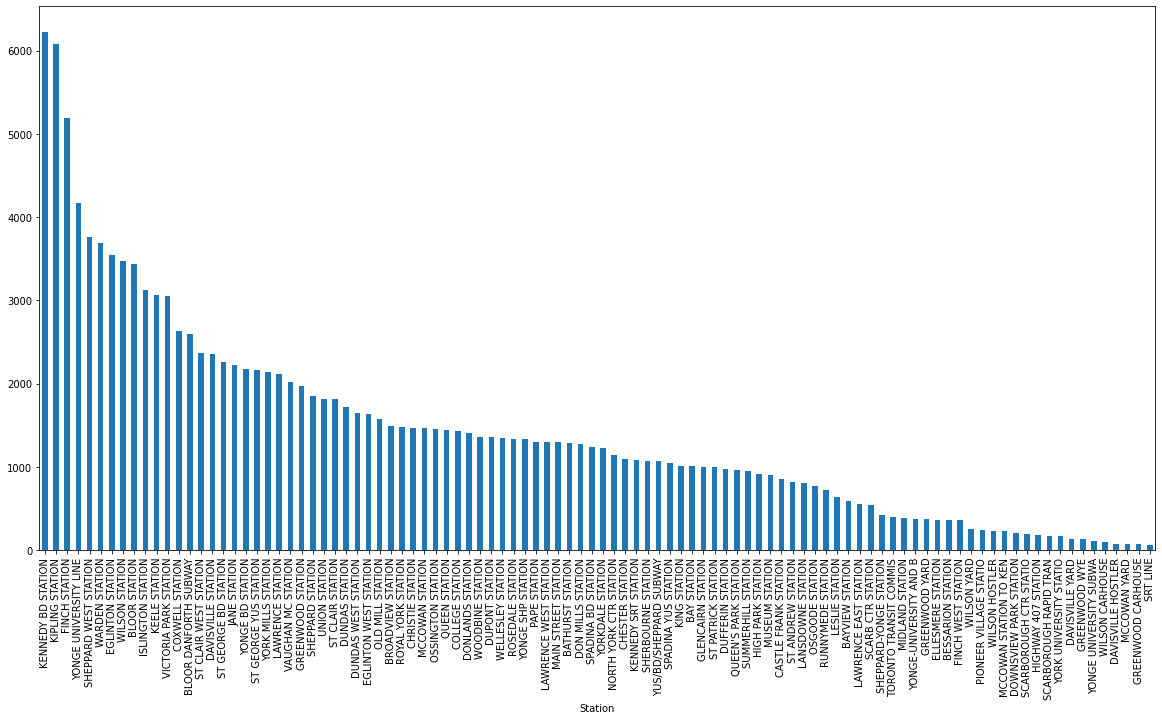

In [34]:
df.groupby('Station')['Code'].count().sort_values(ascending=False).head(100).plot.bar(figsize=(20,10))

# 7) Top 50 Delay Cause (Code) which cause most frequent delay

<AxesSubplot:xlabel='Code'>

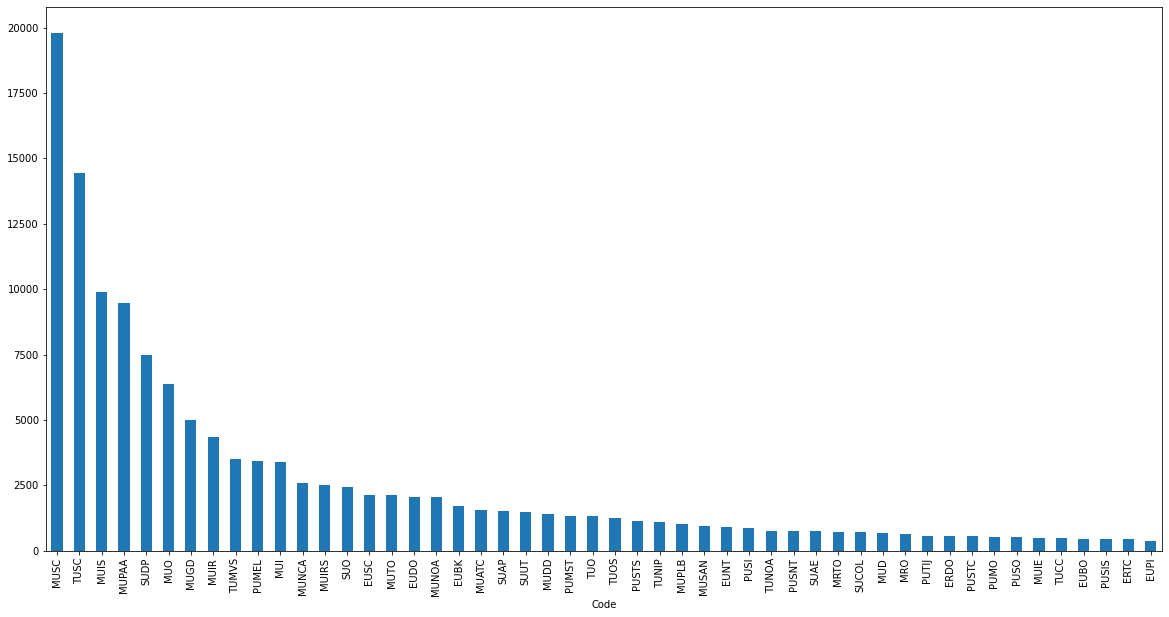

In [35]:
df.groupby('Code')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(20,10))

# 8) Lines which have most frequent delay

<AxesSubplot:xlabel='Line'>

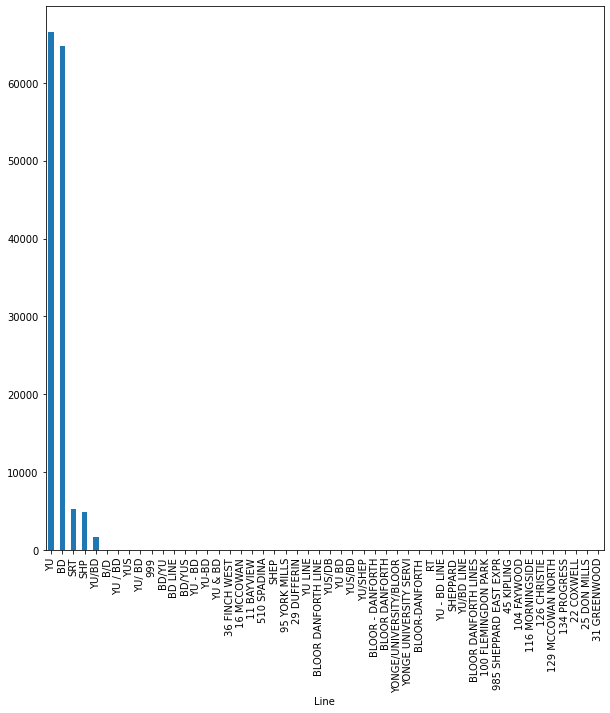

In [36]:
df.groupby('Line')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(10,10))

# 9) Vehicles which have most frequent delay

<AxesSubplot:xlabel='Vehicle'>

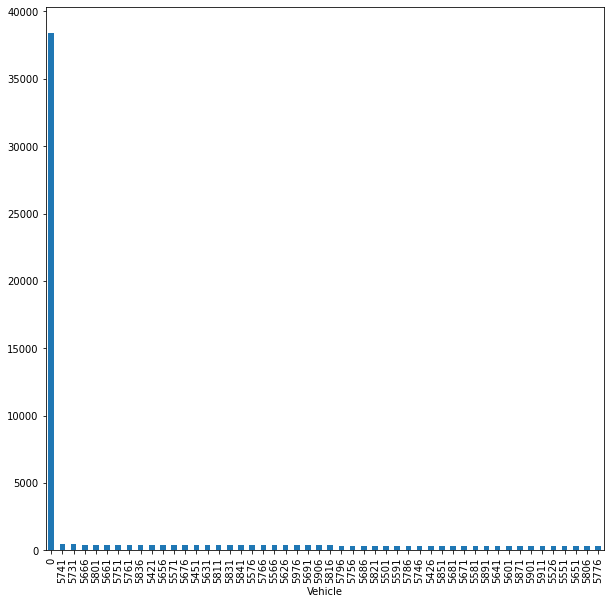

In [37]:
df.groupby('Vehicle')['Code'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(10,10))

# 10) Delay Frequency Top 100 Analysis by Cause(Code), Station and Lines

In [38]:
df1=pd.DataFrame(df.groupby(['Station','Code','Line'])['Code'].count())

In [39]:
df1=df1.rename(columns={'Code': 'num'})
df1=df1.reset_index()

In [40]:
df1=df1.sort_values('num',ascending=False).head(100)

In [41]:
df1

,Station,Code,Line,num
7151,YONGE UNIVERSITY LINE,MUGD,YU,2491
284,BLOOR DANFORTH SUBWAY,MUGD,BD,2182
3135,KIPLING STATION,MUSC,BD,1908
2700,KEELE STATION,MUSC,BD,1609
2838,KENNEDY BD STATION,MUSC,BD,1425
...,...,...,...,...
334,BLOOR STATION,MUIR,YU,220
6983,YONGE BD STATION,SUDP,BD,219
5555,ST CLAIR WEST STATION,MUPAA,YU,210
290,BLOOR DANFORTH SUBWAY,MUO,BD,210


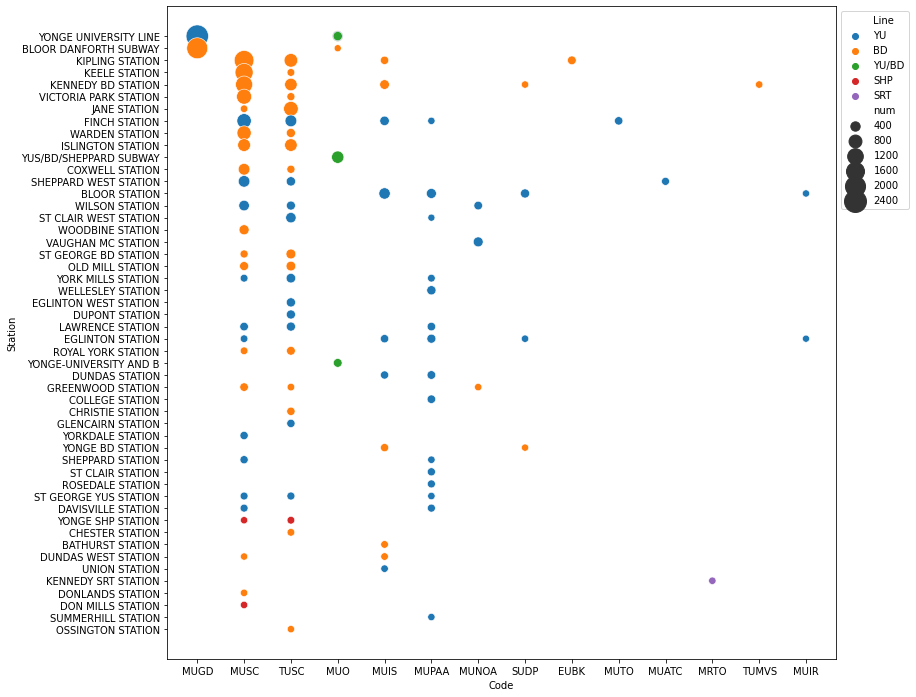

In [42]:
plt.figure(figsize=(12, 12))
plt.legend(fontsize=10)
plt.tick_params(labelsize=10)
ax=sns.scatterplot(x=df1['Code'],y=df1['Station'],hue=df1['Line'],size=df1['num'],data=df1,sizes=(50,500))
ax.legend(loc='upper left',bbox_to_anchor=(1,1))